In [109]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [110]:
# Base directory where datasets are stored
dir_baseline = '../checkpoints/result/'
dir_density_Grad = '../checkpoints/result_density_Grad/'
dir_Opacity = '../checkpoints/result_Opacity/'
dir_rgbW = '../checkpoints/result_rgbW/'
dir_density_rgbW = '../checkpoints/result_density_rgbW/'
dir_density_Com = '../checkpoints/result_density_Com/'
datasets = ['Beauty', 'HoneyBee', 'Jockey']



In [111]:
def parse_train_txt(train_txt_path):
    with open(train_txt_path, 'r') as file:
        lines = file.readlines()
        last_line = lines[-1].strip()
        data = last_line.split(',')
        result = {
            'PSNR': float(data[1].split(':')[-1]),
            'MS-SSIM': float(data[2].split(':')[-1]),
            'Training': float(data[3].split(':')[-1][:-1]),
            'Eval': float(data[4].split(':')[-1][:-1]),
            'FPS': float(data[5].split(':')[-1]),
            'Size': float(data[6].split(':')[-1]),
            'Gaussian_number':float(data[-1].split(':')[-1])
        }    
    return result

In [112]:

# List to store results
results_baseline = []
results_density_Grad = []
results_Opacity = []
results_rgbW = []
results_density_rgbW = []
results_density_Com=[]
# Loop through datasets and collect data from train.txt files
def get_method_data(dir_path):
    results = []
    for dataset in datasets:
        dataset_path = os.path.join(dir_path, dataset)
        for dir_name in os.listdir(dataset_path):
            if dir_name.startswith('GaussianImage_Cholesky'):
                train_txt_path = os.path.join(dataset_path, dir_name, 'train.txt')
                result= parse_train_txt(train_txt_path)
                result['Dataset'] = dataset
                if result['Gaussian_number']>=20000:
                    results.append(result)
    return results

results_baseline = get_method_data(dir_baseline)
results_density_Grad= get_method_data(dir_density_Grad)
results_Opacity= get_method_data(dir_Opacity)
results_rgbW= get_method_data(dir_rgbW)
results_density_rgbW= get_method_data(dir_density_rgbW)
results_density_Com=get_method_data(dir_density_Com)


df_baseline = pd.DataFrame(results_baseline)
df_density_Grad = pd.DataFrame(results_density_Grad)
df_Opacity = pd.DataFrame(results_Opacity)
df_rgbW = pd.DataFrame(results_rgbW)
df_density_rgbW = pd.DataFrame(results_density_rgbW)
df_density_Com = pd.DataFrame(results_density_Com)

# # Sort the results by GaussianCount before converting to DataFrame
# results_sorted_new_method_5 = sorted(results_new_method_5, key=lambda x: x['Gaussian_number'])



In [113]:
def plot_gaussian_vs_metrics(df_baseline, df_density_Grad, df_Opacity, df_rgbW, df_density_rgbW, df_density_Com):
        #color_palette = plt.cm.get_cmap('tab10', 6)
        color_palette =['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33']
        datasets_info = [
                ('Opacity', df_Opacity),
                ('Adaptive_Control(Grad)', df_density_Grad),
                ('rgbW', df_rgbW),
                
                
                ('Baseline', df_baseline),
                ('Adaptive_Control(rgbW)', df_density_rgbW),
                # ('Adaptive_Control(Combine)', df_density_Com),
        ]

        for dataset in datasets:
                sorted_datasets = []
                for label, df in datasets_info:
                        sorted_datasets.append((label, df[df['Dataset'] == dataset].sort_values(by='Gaussian_number')))

                plt.figure(figsize=(11, 5))
                plt.subplot(1, 2, 1)
                for i, (label, subset_df) in enumerate(sorted_datasets):
                        # Scatter plot
                        plt.scatter(subset_df['Gaussian_number'], subset_df['PSNR'], 
                                        color=color_palette[i], s=50, label=label, edgecolor='black')
                        # Line plot
                        plt.plot(subset_df['Gaussian_number'], subset_df['PSNR'], 
                                color=color_palette[i])

                plt.xlabel('Gaussian Number', fontsize=14, fontweight='bold')
                plt.ylabel('PSNR (dB)', fontsize=14, fontweight='bold')
                plt.title(f'{dataset} - Gaussian Number vs PSNR', fontsize=16, fontweight='bold')
                plt.grid(True, which='both', linestyle='--', linewidth=0.5)
                plt.legend()

                plt.subplot(1, 2, 2)
                for i, (label, subset_df) in enumerate(sorted_datasets):
                        # Scatter plot
                        plt.scatter(subset_df['Gaussian_number'], subset_df['MS-SSIM'], 
                                        color=color_palette[i], s=50, label=label, edgecolor='black')
                        # Line plot
                        plt.plot(subset_df['Gaussian_number'], subset_df['MS-SSIM'], 
                                color=color_palette[i])

                plt.xlabel('Gaussian Number', fontsize=14, fontweight='bold')
                plt.ylabel('MS-SSIM', fontsize=14, fontweight='bold')
                plt.title(f'{dataset} - Gaussian Number vs MS-SSIM', fontsize=16, fontweight='bold')
                plt.grid(True, which='both', linestyle='--', linewidth=0.5)
                plt.legend()
                plt.tight_layout()

                plt.savefig(f'./img_compare/{dataset}_gaussian_vs_metrics.png')
                plt.show()


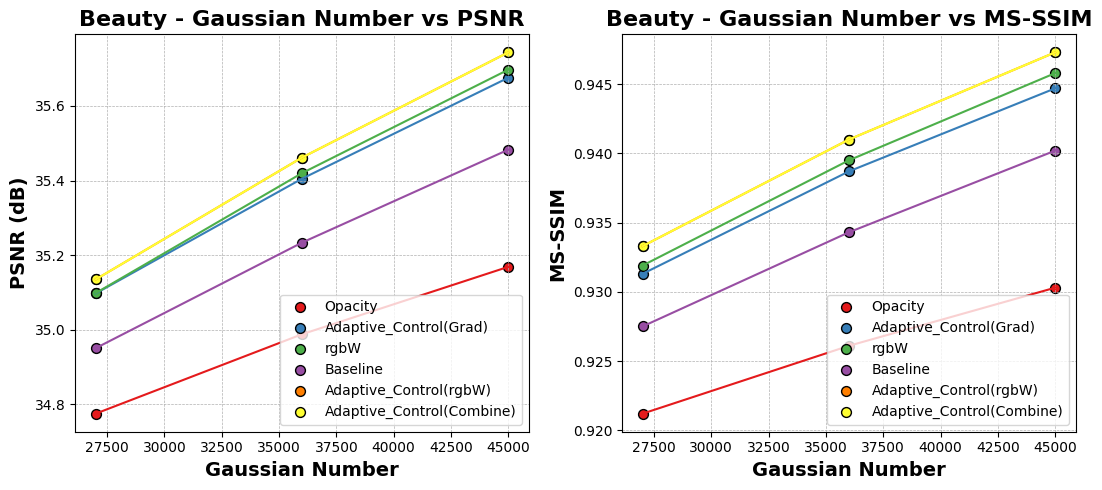

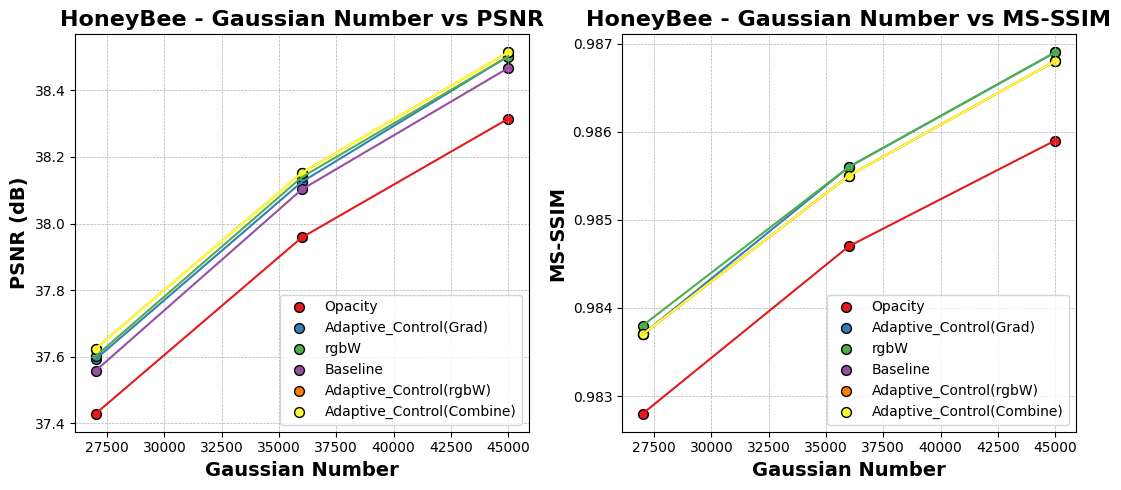

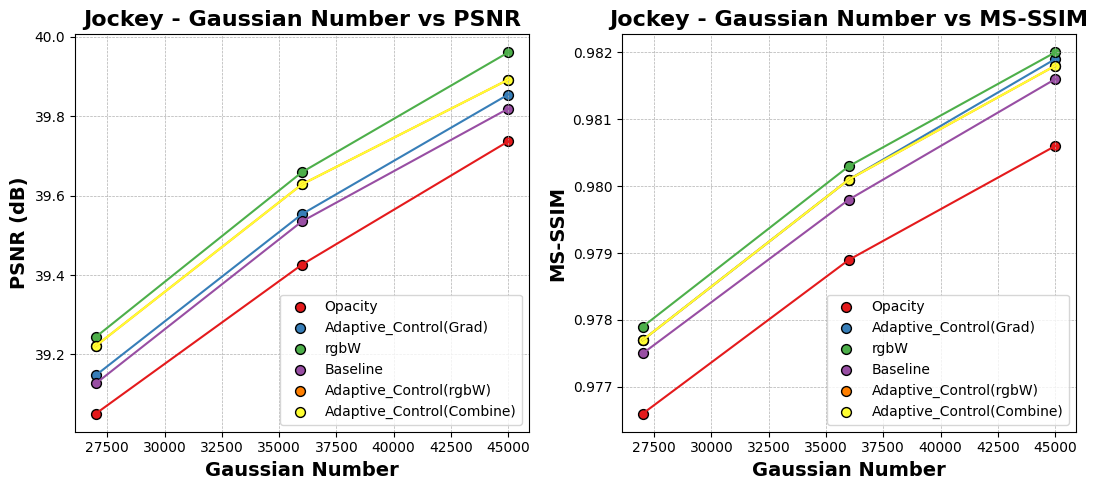

In [114]:
plot_gaussian_vs_metrics(df_baseline, df_density_Grad, df_Opacity, df_rgbW,df_density_rgbW,df_density_rgbW)